In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
 df=pd.read_csv("twitter_training.csv",header=None)

In [3]:
df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
# Rename columns if necessary
df.columns = ['text_id', 'product', 'sentiment', 'text']

df.columns

Index(['text_id', 'product', 'sentiment', 'text'], dtype='object')

In [5]:
df.duplicated().sum()

2700

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['text'].isnull().sum()

326

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71656 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_id    71656 non-null  int64 
 1   product    71656 non-null  object
 2   sentiment  71656 non-null  object
 3   text       71656 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [10]:
df

,text_id,product,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
df["sentiment"].value_counts()

sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [12]:
df=df.replace({"Irrelevant":"Neutral"})

In [13]:
df["product"].value_counts()

product
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                    

C:\Users\guriv\AppData\Local\Temp\ipykernel_10256\2881950396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


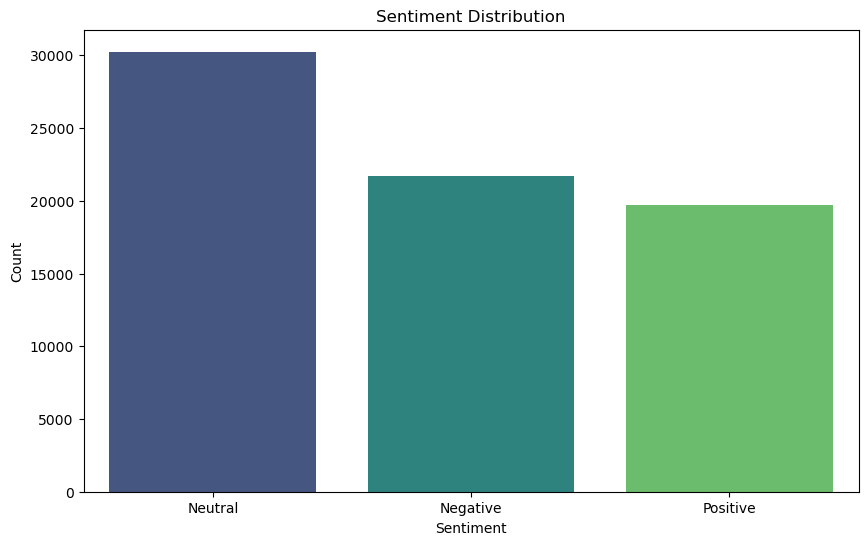

In [15]:
# Example insights and visualizations

# Insight 1: Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

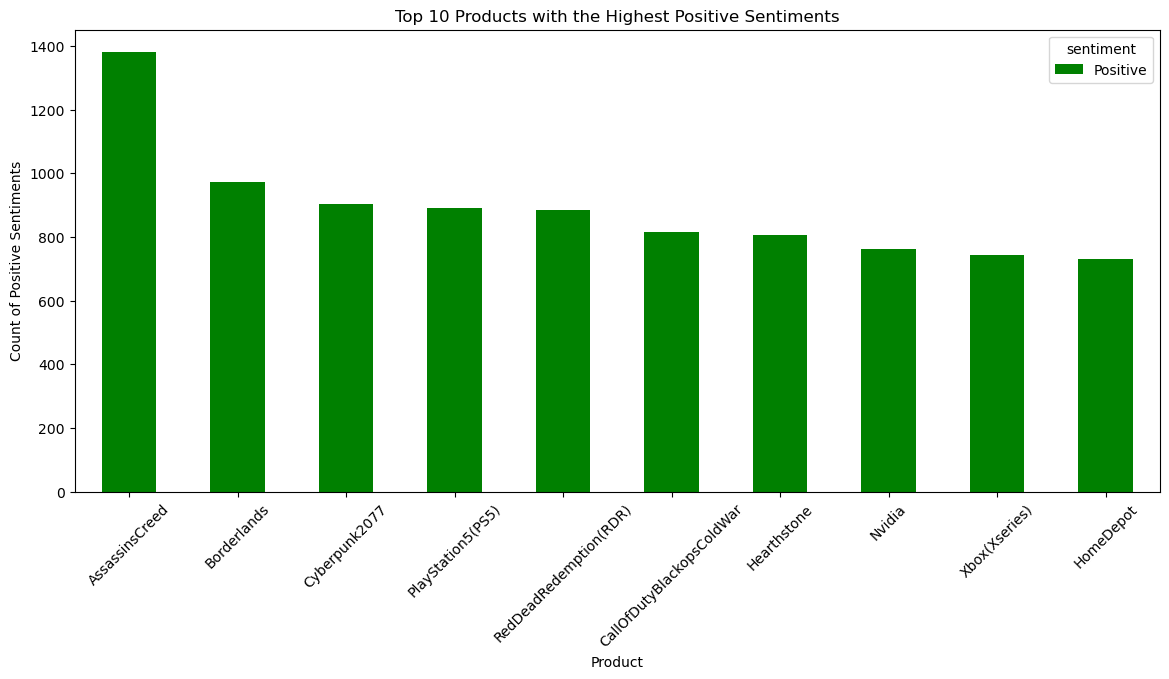

In [16]:
# Group by product and sentiment and count the occurrences
product_sentiment = df.groupby(['product', 'sentiment']).size().unstack().fillna(0)

# Sort products by the count of positive sentiments
top_positive_products = product_sentiment.sort_values(by='Positive', ascending=False).head(10)

# Plot the products with the highest positive sentiments
top_positive_products[['Positive']].plot(kind='bar', figsize=(14, 6), color='green')
plt.title('Top 10 Products with the Highest Positive Sentiments')
plt.xlabel('Product')
plt.ylabel('Count of Positive Sentiments')
plt.xticks(rotation=45)
plt.show()


In [44]:
# Group by product and sentiment and count the occurrences
product_sentiment_counts = df.groupby(['product', 'sentiment']).size().unstack().fillna(0)

# Add a column for the difference between Positive and Negative sentiments
product_sentiment_counts['Difference'] = product_sentiment_counts['Positive'] - product_sentiment_counts['Negative']
# Filter products with more positive than negative sentiments
positive_over_negative = product_sentiment_counts[product_sentiment_counts['Difference'] > 0].sort_values(by='Difference', ascending=False)

# Filter products with more negative than positive sentiments
negative_over_positive = product_sentiment_counts[product_sentiment_counts['Difference'] < 0].sort_values(by='Difference')



<Figure size 1400x800 with 0 Axes>

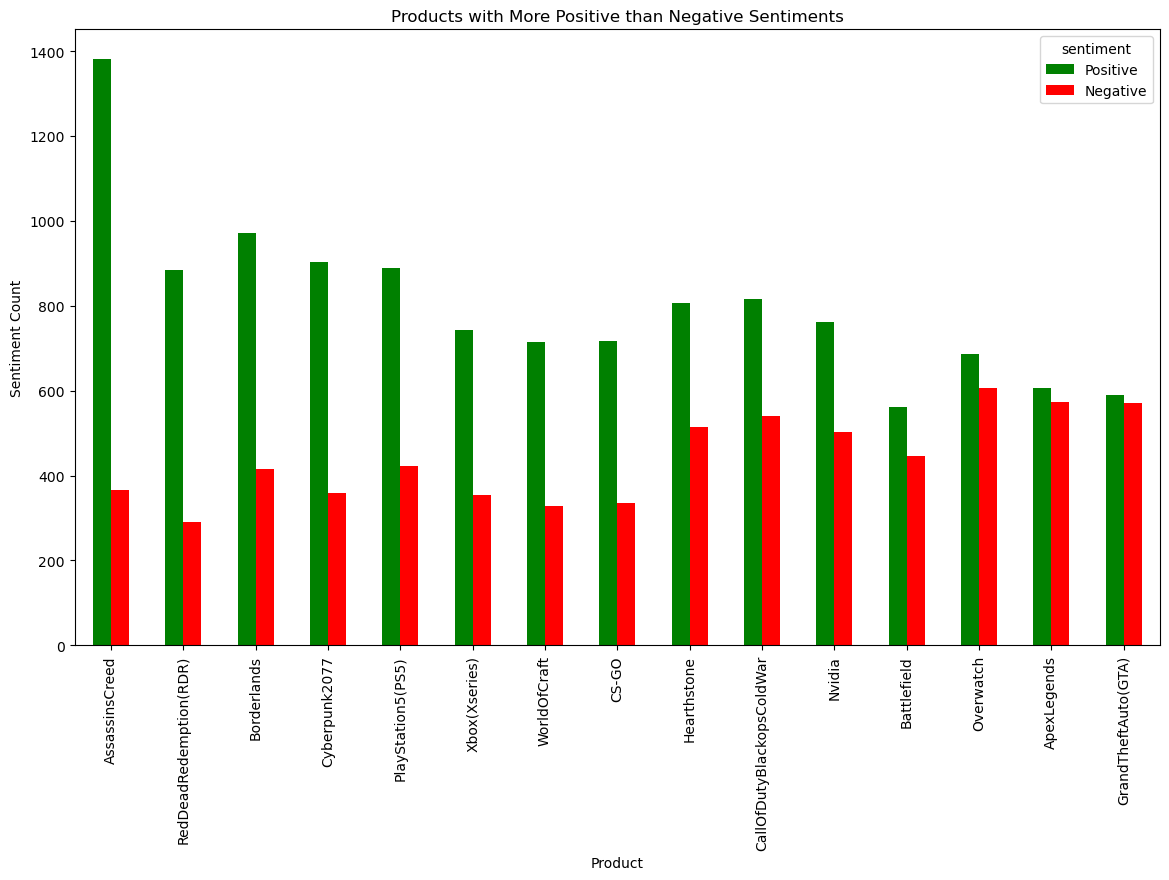

<Figure size 1400x800 with 0 Axes>

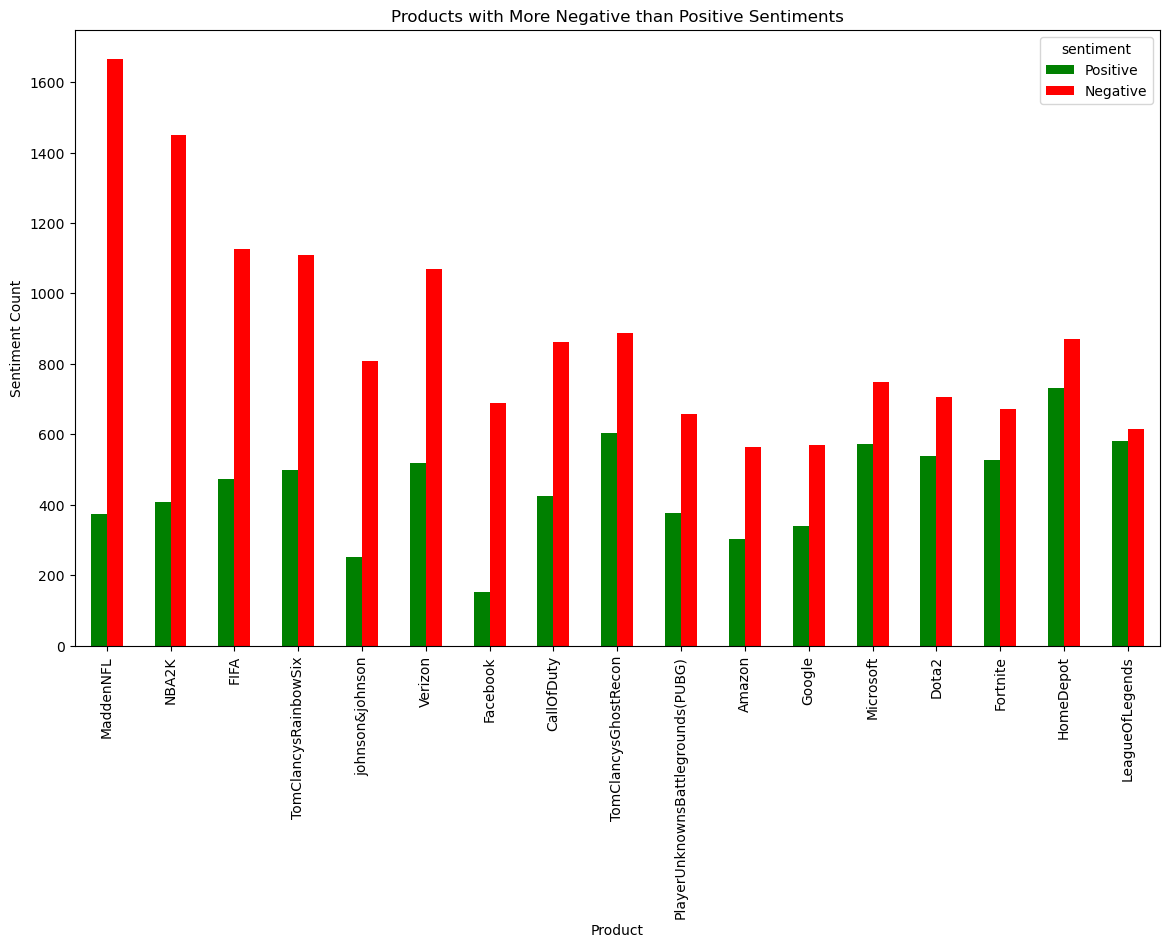

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3A: Plot for Products with More Positive than Negative Sentiments
plt.figure(figsize=(14, 8))
positive_over_negative[['Positive', 'Negative']].plot(kind='bar', stacked=False, figsize=(14, 8), color=['green', 'red'])
plt.title('Products with More Positive than Negative Sentiments')
plt.xlabel('Product')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=90)
plt.show()

# Step 3B: Plot for Products with More Negative than Positive Sentiments
plt.figure(figsize=(14, 8))
negative_over_positive[['Positive', 'Negative']].plot(kind='bar', stacked=False, figsize=(14, 8), color=['green', 'red'])
plt.title('Products with More Negative than Positive Sentiments')
plt.xlabel('Product')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=90)
plt.show()


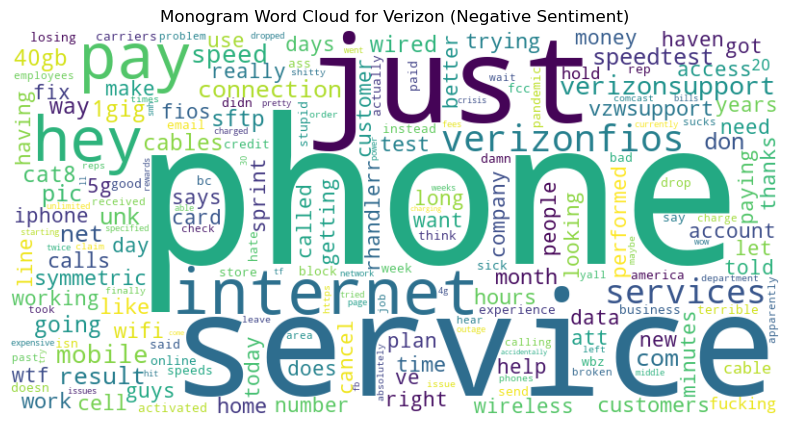

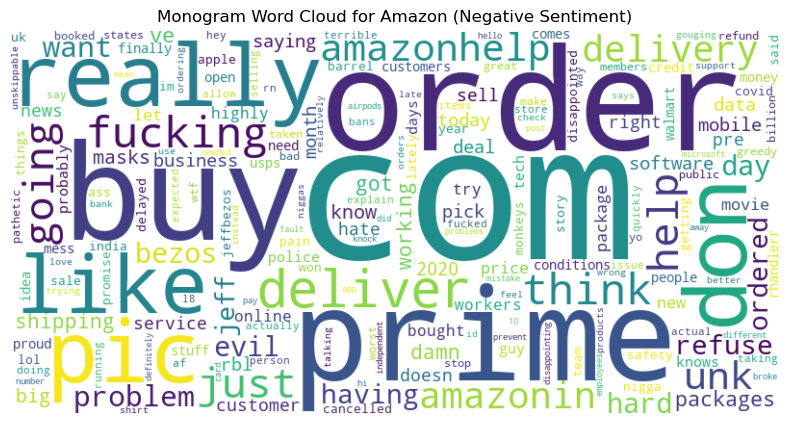

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate word cloud for a specific product and sentiment with monograms, excluding certain words
def generate_monogram_wordcloud(df, product_name, sentiment, exclude_words=None):
    # Filter the DataFrame for the specific product and sentiment
    product_df = df[(df['product'] == product_name) & (df['sentiment'] == sentiment)]
    
    # Join all the text into one string
    text = ' '.join(product_df['text'])
    
    # Tokenize and filter out unwanted words
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])
    
    # Get the words and their frequencies
    words = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    
    # Exclude specific words
    if exclude_words:
        words = {k: v for k, v in words.items() if k.lower() not in exclude_words}
    
    # Generate the word cloud from monograms
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Monogram Word Cloud for {product_name} ({sentiment} Sentiment)")
    plt.show()

# List of words to exclude
exclude_words = ['verizon', 'amazon', 'twitter', 'fuck', 'shit']

# Generate monogram word clouds for Verizon and Amazon focusing on negative sentiments

# Monogram word cloud for Verizon (Negative Sentiment)
generate_monogram_wordcloud(df, 'Verizon', sentiment='Negative', exclude_words=exclude_words)

# Monogram word cloud for Amazon (Negative Sentiment)
generate_monogram_wordcloud(df, 'Amazon', sentiment='Negative', exclude_words=exclude_words)


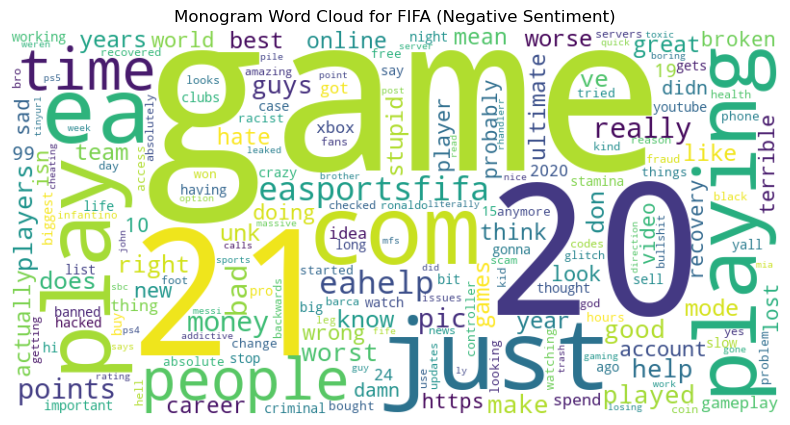

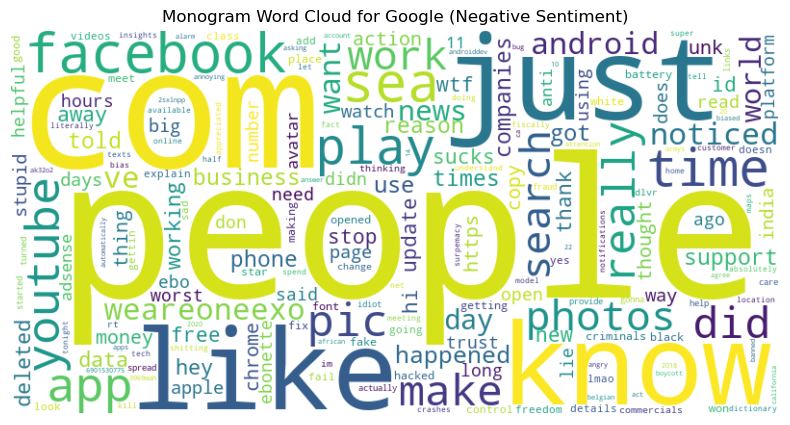

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate word cloud for a specific product and sentiment with monograms, excluding certain words
def generate_monogram_wordcloud(df, product_name, sentiment, exclude_words=None):
    # Filter the DataFrame for the specific product and sentiment
    product_df = df[(df['product'] == product_name) & (df['sentiment'] == sentiment)]
    
    # Join all the text into one string
    text = ' '.join(product_df['text'])
    
    # Tokenize and filter out unwanted words
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])
    
    # Get the words and their frequencies
    words = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    
    # Exclude specific words
    if exclude_words:
        words = {k: v for k, v in words.items() if k.lower() not in exclude_words}
    
    # Generate the word cloud from monograms
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Monogram Word Cloud for {product_name} ({sentiment} Sentiment)")
    plt.show()

# List of words to exclude
exclude_words = ['fifa', 'google', 'twitter', 'fuck', 'fucking', 'shit']

# Generate monogram word clouds for FIFA and Google focusing on negative sentiments

# Monogram word cloud for FIFA (Negative Sentiment)
generate_monogram_wordcloud(df, 'FIFA', sentiment='Negative', exclude_words=exclude_words)

# Monogram word cloud for Google (Negative Sentiment)
generate_monogram_wordcloud(df, 'Google', sentiment='Negative', exclude_words=exclude_words)


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Function to perform topic modeling on negative reviews for a product
def topic_modeling_on_negative_reviews(df, product_name, num_topics=5, num_words=20):
    # Filter the DataFrame for the specific product and negative sentiment
    product_df = df[(df['product'] == product_name) & (df['sentiment'] == 'Negative')]
    
    if product_df.empty:
        print(f"No negative reviews found for {product_name}.")
        return
    
    # Preprocess the text data
    vectorizer = CountVectorizer(stop_words='english', max_features=5000)
    X = vectorizer.fit_transform(product_df['text'])
    
    # Apply LDA for topic modeling
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    
    # Display the topics
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Product: {product_name} - Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))
        print()

# Apply topic modeling to Verizon, Facebook, Amazon, FIFA, and Google
products_to_analyze = ['Verizon', 'Facebook', 'Amazon', 'FIFA', 'Google']
for product in products_to_analyze:
    topic_modeling_on_negative_reviews(df, product, num_topics=5, num_words=20)


Product: Verizon - Topic #1:
verizon shit phone working make got wifi fix 5g isn line trying pay verizonsupport ve don people calls currently hours

Product: Verizon - Topic #2:
verizon service mobile phone unk right don company going america wtf sucks wifi money like people area customer called dropped

Product: Verizon - Topic #3:
verizon just phone service told guys work fuck minutes don way day wbz week want paid internet home new hate

Product: Verizon - Topic #4:
verizon internet hey pay services speed result net verizonfios speedtest connection verizonsupport cables cat8 sftp wired 1gig 40gb test symmetric

Product: Verizon - Topic #5:
verizon com pic twitter phone mobile cell rhandlerr hours sprint just time vzwsupport ve calls number today way department broken

Product: Facebook - Topic #1:
facebook tech twitter google unk com street youtube ads big delayed pic trump 2020 issues advertising stop amazon main fucking

Product: Facebook - Topic #2:
facebook twitter love com peop

In [24]:
import re
import string
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guriv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# 1. Text Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words, perform stemming, and remove short words
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    
    # Handle emojis (optional: this can be a separate step to convert emojis)
    # Example: If needed, you can map emojis to words using a dictionary.
    
    # Remove excessive whitespace
    text = ' '.join(words).strip()
    
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)


C:\Users\guriv\AppData\Local\Temp\ipykernel_10256\2007358007.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
# 2. Text Representation (Bag of Words)
vectorizer = CountVectorizer()

In [36]:
from sklearn.model_selection import train_test_split
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# 4. Machine Learning Model (Naive Bayes as an example)
model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



In [39]:
from sklearn.metrics import accuracy_score
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7497906782026235


In [40]:
# Using TF-IDF Vectorizer instead of CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Update the model pipeline
model = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7605358638012838
